# Classification example

Classification --> Supervised Learning --> Machine Learning

# 0. Set up

`pip install scikit-learn`

In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

from sklearn import cross_validation, datasets, decomposition, metrics, svm


## 1. Understand data

In [2]:
digits = datasets.load_digits()
data = digits.images
target = digits.target

In [3]:
data.shape

(1797, 8, 8)

In [4]:
target.shape

(1797,)

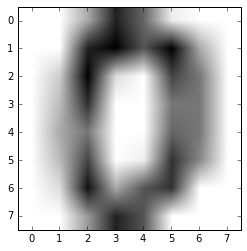

In [5]:
pyplot.imshow(data[0], cmap=pyplot.cm.gray_r)

In [6]:
target[0]

0

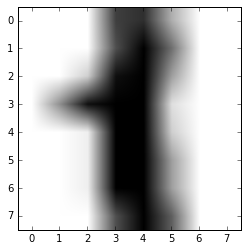

In [7]:
pyplot.imshow(data[1], cmap=pyplot.cm.gray_r)

In [8]:
target[1]

1

## 2. Turn data into vectors

In [9]:
X = numpy.array([x.flatten() for x in data])

In [10]:
X.shape

(1797, 64)

In [11]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

## 3. Visualize data

In [12]:
pca = decomposition.PCA(n_components=2)
reduced = pca.fit_transform(X)

In [13]:
reduced.shape

(1797, 2)

In [14]:
x = reduced[:,0]
y = reduced[:,1]
colors = pyplot.get_cmap('Accent')
color = colors(target/10)

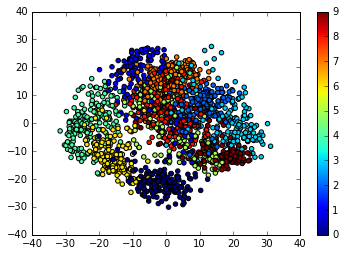

In [15]:
fig = pyplot.figure()
pyplot.scatter(reduced[:,0], reduced[:,1], c=target)
cb = pyplot.colorbar()

## 4. Separate out training and testing data

colors(0.5)

In [16]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
    X, target, test_size=0.25)

## 5. Choose a classifier

In [27]:
from sklearn import ensemble

In [28]:
#model = svm.SVC(kernel='linear')a
model = ensemble.RandomForestClassifier(n_estimators=100)

## 6. Train your classifier

In [29]:
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 7. Predict

In [30]:
predictions = model.predict(X_test)
predictions

array([9, 4, 5, 2, 3, 4, 6, 4, 8, 0, 9, 1, 8, 2, 0, 2, 8, 4, 3, 9, 5, 5, 7,
       3, 7, 1, 5, 4, 3, 8, 9, 0, 1, 6, 0, 9, 7, 8, 3, 0, 4, 0, 2, 1, 0, 4,
       5, 5, 7, 3, 9, 1, 6, 7, 1, 9, 6, 8, 3, 8, 9, 1, 7, 3, 2, 3, 1, 4, 8,
       7, 6, 9, 7, 4, 5, 4, 9, 8, 2, 2, 7, 7, 7, 4, 3, 4, 8, 5, 9, 9, 2, 3,
       0, 8, 8, 0, 8, 6, 6, 6, 7, 9, 1, 4, 0, 0, 4, 9, 7, 6, 1, 2, 7, 1, 3,
       1, 7, 0, 5, 4, 2, 1, 2, 0, 8, 2, 8, 3, 4, 3, 1, 6, 7, 7, 4, 1, 5, 4,
       9, 7, 0, 9, 2, 7, 6, 8, 2, 7, 1, 4, 8, 9, 7, 3, 2, 1, 8, 9, 9, 6, 9,
       1, 2, 4, 4, 6, 5, 6, 0, 0, 4, 9, 7, 4, 9, 6, 3, 5, 0, 5, 7, 8, 5, 0,
       8, 2, 9, 3, 7, 1, 7, 5, 8, 0, 8, 0, 8, 9, 4, 3, 4, 3, 0, 9, 2, 9, 8,
       4, 1, 2, 1, 8, 5, 3, 1, 2, 1, 1, 0, 7, 5, 8, 2, 7, 9, 8, 6, 8, 8, 6,
       5, 1, 8, 5, 3, 6, 6, 5, 9, 0, 2, 6, 8, 0, 5, 7, 3, 7, 0, 9, 6, 1, 6,
       8, 6, 0, 4, 4, 1, 0, 2, 3, 7, 4, 1, 4, 2, 8, 6, 0, 4, 9, 3, 5, 3, 3,
       3, 3, 3, 0, 2, 0, 1, 7, 7, 0, 1, 2, 2, 5, 3, 2, 2, 8, 7, 9, 4, 5, 5,
       0, 6,

## 8. Evaluate

In [31]:
model.score(X_test, Y_test)

0.97111111111111115

In [26]:
metrics.confusion_matrix(Y_test, predictions)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 39]])

## 9. Do better

???